<img src="http://www.melbourne.vic.gov.au/SiteCollectionImages/events-partnerships.jpg" style="float: top; margin: 20px; height: 300px">

## Time Series of Pedestrians in Melbourne

_Sharleen Othman_


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
import statsmodels.api as sm  
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
import itertools
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

Im my previous notebook, I was not able to postitively determine any linakge between businesses in the area with the pedestrian groups that pass by it. Looking at it from a different angle, I will look at 'events' in time and see how different areas are affected.

In [2]:
ped = pd.read_csv('./data_imgs/main_ped.csv')
ped.head()

Date_Time                 Sensor_Name  Hourly_Counts
0   01-JUN-2009 00:00            Town Hall (West)            194
1   01-JUN-2009 00:00       Collins Place (South)             21
2   01-JUN-2009 00:00       Collins Place (North)              9
3   01-JUN-2009 00:00        Australia on Collins             39
4   01-JUN-2009 00:00  Bourke Street Mall (South)             28

In [3]:
ped.Sensor_Name.unique()

array(['Town Hall (West)', 'Collins Place (South)',
       'Collins Place (North)', 'Australia on Collins',
       'Bourke Street Mall (South)', 'Bourke Street Mall (North)',
       'Flagstaff Station', 'Melbourne Central', 'State Library',
       'Southern Cross Station', 'Victoria Point', 'New Quay',
       'Waterfront City', 'Webb Bridge', 'Princes Bridge',
       'Flinders Street Station Underpass', 'Sandridge Bridge',
       'Birrarung Marr', 'Spencer St-Collins St (North)',
       'Spencer St-Collins St (South)',
       'Melbourne Convention Exhibition Centre',
       'Bourke St-Russell St (West)', 'Chinatown-Swanston St (North)',
       'Flinders St-Elizabeth St (East)', 'QV Market-Peel St',
       'Chinatown-Lt Bourke St (South)', 'The Arts Centre',
       'QV Market-Elizabeth St (West)', 'Lygon St (West)',
       'St Kilda Rd-Alexandra Gardens', 'Lonsdale St (South)',
       'City Square', 'Flinders St-Spring St (West)',
       'Flinders St-Spark La', 'Alfred Place',
       'F

In [4]:
ped.Sensor_Name = ped.Sensor_Name.str.replace(" ", "_")
ped.Sensor_Name = ped.Sensor_Name.str.replace("-", "_")
ped.Sensor_Name = ped.Sensor_Name.str.replace("(", "")
ped.Sensor_Name = ped.Sensor_Name.str.replace(")", "")
ped.Sensor_Name.unique()

array(['Town_Hall_West', 'Collins_Place_South', 'Collins_Place_North',
       'Australia_on_Collins', 'Bourke_Street_Mall_South',
       'Bourke_Street_Mall_North', 'Flagstaff_Station',
       'Melbourne_Central', 'State_Library', 'Southern_Cross_Station',
       'Victoria_Point', 'New_Quay', 'Waterfront_City', 'Webb_Bridge',
       'Princes_Bridge', 'Flinders_Street_Station_Underpass',
       'Sandridge_Bridge', 'Birrarung_Marr', 'Spencer_St_Collins_St_North',
       'Spencer_St_Collins_St_South',
       'Melbourne_Convention_Exhibition_Centre',
       'Bourke_St_Russell_St_West', 'Chinatown_Swanston_St_North',
       'Flinders_St_Elizabeth_St_East', 'QV_Market_Peel_St',
       'Chinatown_Lt_Bourke_St_South', 'The_Arts_Centre',
       'QV_Market_Elizabeth_St_West', 'Lygon_St_West',
       'St_Kilda_Rd_Alexandra_Gardens', 'Lonsdale_St_South', 'City_Square',
       'Flinders_St_Spring_St_West', 'Flinders_St_Spark_La',
       'Alfred_Place', 'Flinders_St_Swanston_St_West',
       'Lonsda

In [5]:
stations = ['Flagstaff_Station', 'Bourke_Street_Mall_South']
tables = []
for station in stations:
    station  = ped[ped['Sensor_Name']== station]
    station = station.loc[:,['Date_Time','Hourly_Counts']]
    tables.append(station)
    print(station.shape)
  

(69403, 2)
(69403, 2)


In [6]:
Flagstaff_Station = tables[0]
Bourke_Street_Mall_South = tables[1]

In [7]:
Flagstaff_Station.head()

Date_Time  Hourly_Counts
6    01-JUN-2009 00:00              1
23   01-JUN-2009 01:00              4
40   01-JUN-2009 02:00              0
57   01-JUN-2009 03:00             15
74   01-JUN-2009 04:00              2

In [8]:
Flagstaff_Station.set_index('Date_Time', inplace=True)
Flagstaff_Station.index = pd.to_datetime(Flagstaff_Station.index)

Bourke_Street_Mall_South.set_index('Date_Time', inplace=True)
Bourke_Street_Mall_South.index = pd.to_datetime(Bourke_Street_Mall_South.index)

ped.set_index('Date_Time', inplace=True)
ped.index = pd.to_datetime(ped.index)

In [9]:
# The 'MS' string groups the data in buckets by start of the month
Flagstaff_Station = Flagstaff_Station['Hourly_Counts'].resample('MS').sum()
Flagstaff_Station = Flagstaff_Station.fillna(Flagstaff_Station.bfill())
Flagstaff_Station.name = 'Flagstaff_Station'

# The 'MS' string groups the data in buckets by start of the month
Bourke_Street_Mall_South = Bourke_Street_Mall_South['Hourly_Counts'].resample('MS').sum()
Bourke_Street_Mall_South = Bourke_Street_Mall_South.fillna(Bourke_Street_Mall_South.bfill())
Bourke_Street_Mall_South.name = 'Bourke_Street_Mall_South'


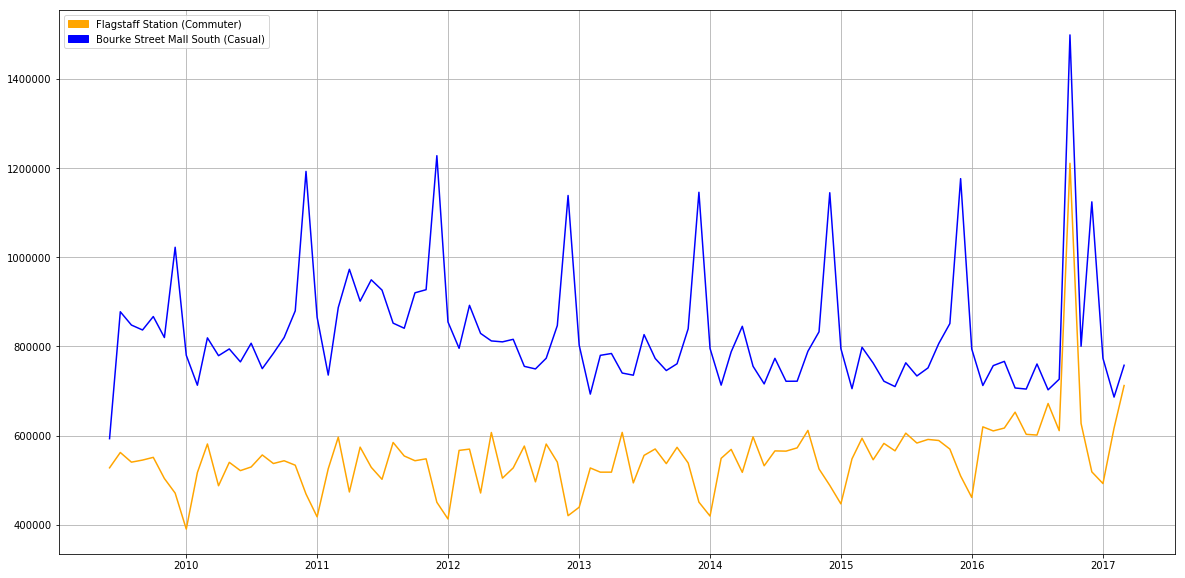

In [10]:
# First, plot pedestrian count over time (not unique count) to see what's going on 
plots = [Flagstaff_Station, Bourke_Street_Mall_South]


plt.figure(figsize=(20,10))
plt.plot(Flagstaff_Station,'orange')  
plt.plot(Bourke_Street_Mall_South,'b')  

orange_patch = mpatches.Patch(color='orange', label='Flagstaff Station (Commuter)')
blue_patch = mpatches.Patch(color='blue', label='Bourke Street Mall South (Casual)')

plt.legend(handles=[orange_patch,blue_patch])

plt.grid()

plt.show()

# it looks like everytime there is a spike in Bourke Street  (casual) pedestrian count, it's complimented by  a drop in Flagstaff (commuter) pedestrian count.
# This makes sense since people tend to take leave during the end of the year

# Also, Major spikes happen every year at the end of the year for Casual pedestrians. 
# Whilst for commuters, there seems to be an almost quarterly rise and fall


In [37]:
from IPython.display import Image
Image(url='./data_imgs/Webp.net-gifmaker.gif')  

#In tableau, I quickly took a look at total pedestrian count for every day of october 2016 compared to october 2015
# There were 3 definitive days that were logging high hourly counts in 2016 (Blue and Pink line)
# These two days correspond with AFL Grand Final (1st Oct), Melbourne Marathon (16 Oct) and Melbourne Cup Day (31 Oct)

# And from the chart above, we know that these days affected both commuter and casual areas in Melbourne


Let's see if there are other anomalies in our time series.
Using decomposition I can see the different elements in my time series, Trend and Seasonality will be separated out.

In [11]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=3) #taking 12 months
    rolstd = pd.rolling_std(timeseries, window=3)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(15,10))
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

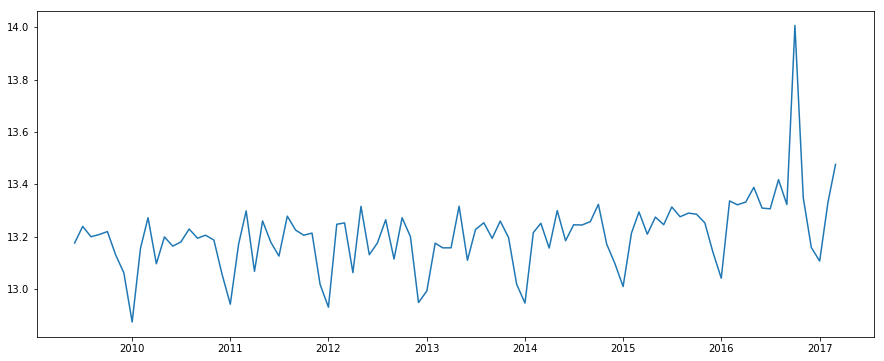

In [12]:
# Especially when there is an increasing trend, using log transform first will help with stationarity
#  I know there is an increasing trend from the decomposition I did below.
pedf_log = np.log(Flagstaff_Station)
plt.plot(pedf_log)


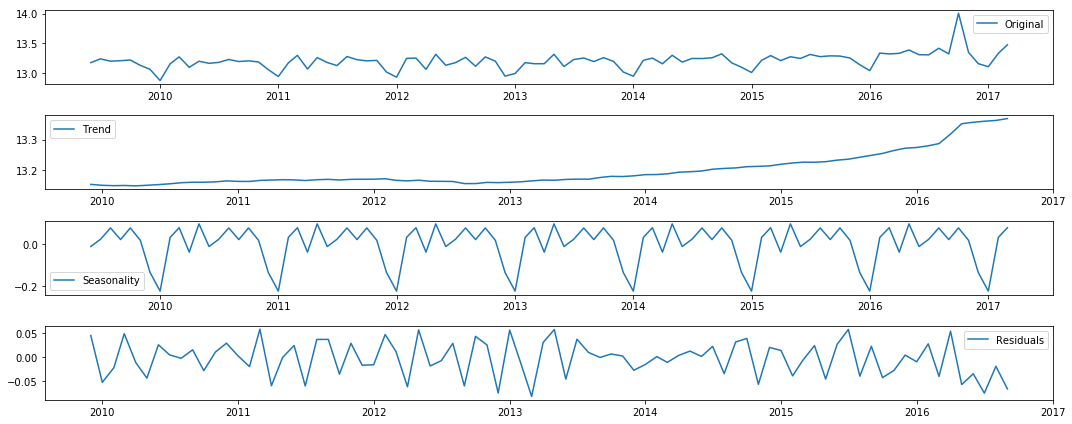

In [13]:
decompositionf = seasonal_decompose(pedf_log)

trendf = decompositionf.trend
seasonalf = decompositionf.seasonal
residualf = decompositionf.resid

plt.subplot(411)
plt.plot(pedf_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trendf, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonalf,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residualf, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#Looking at this, I know that for commuter areas, there's been a steady rise in recent years.
# Compared to the original line however, we can see now that seasonality of Commuter areas is indeed quarterly


/Users/sharleenies/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
/Users/sharleenies/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).std()


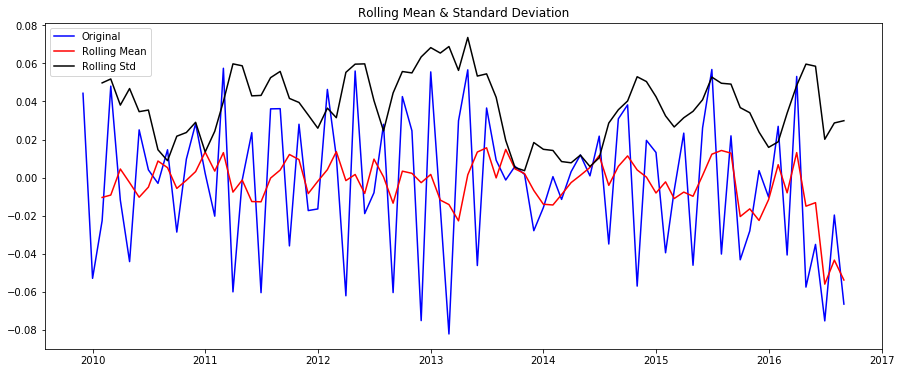

Results of Dickey-Fuller Test:
Test Statistic                 -3.302153
p-value                         0.014783
#Lags Used                      4.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [14]:
ts_logf_decompose = residualf
ts_logf_decompose.dropna(inplace=True)
test_stationarity(ts_logf_decompose)

#I'll cotinue by testing out the stationarity using the residuals as this would be useful later on when I do forecasting.

# Test statistic should be larger than my critical values for it to be stationary.
# There are 2 major reasons behind non-stationarity of a TS:
# 1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of pedestrians was growing over time.
# 2. Seasonality – variations at specific time-frames. 



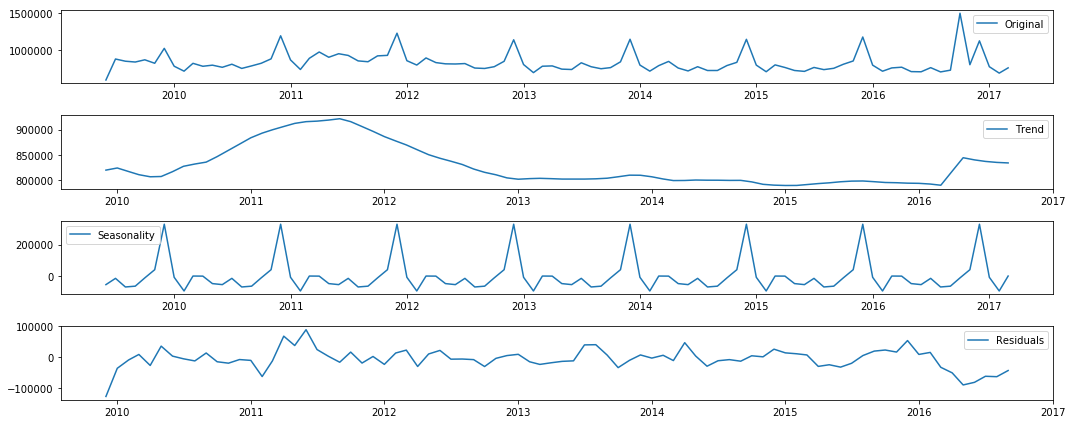

In [15]:
decompositionB = seasonal_decompose(Bourke_Street_Mall_South)

trendB = decompositionB.trend
seasonalB = decompositionB.seasonal
residualB = decompositionB.resid

plt.subplot(411)
plt.plot(Bourke_Street_Mall_South, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trendB, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonalB,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residualB, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#Unlike commuter areas, Bourke Street Mall casual area's trend is slightly more complicated, having fallen in 2014 and risen back up recently
# The seasonality is also very different with the peak being only in the later month of the year


/Users/sharleenies/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
/Users/sharleenies/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).std()


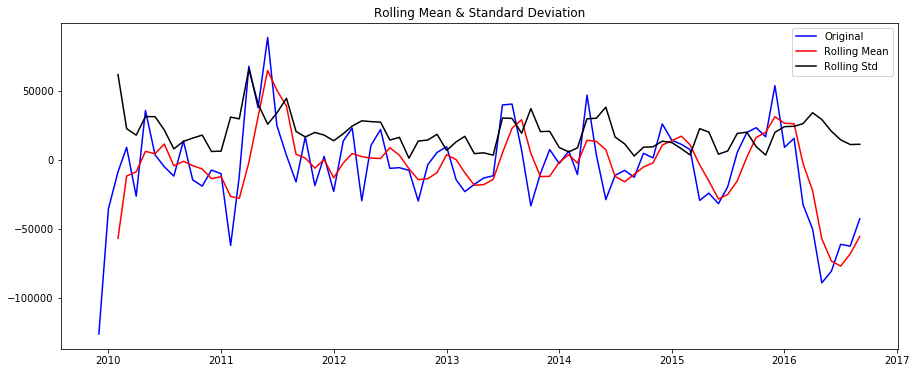

Results of Dickey-Fuller Test:
Test Statistic                -5.873294e+00
p-value                        3.202620e-07
#Lags Used                     0.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64


In [16]:
ts_logB_decompose = residualB
ts_logB_decompose.dropna(inplace=True)
test_stationarity(ts_logB_decompose)

#this one is stationary

/Users/sharleenies/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
/Users/sharleenies/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()


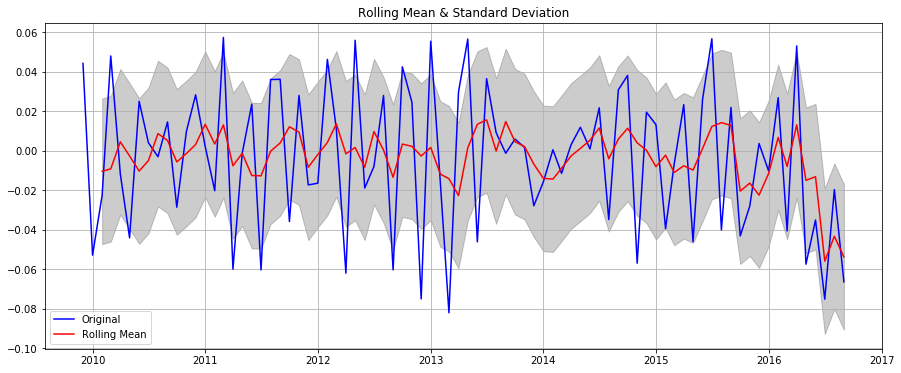

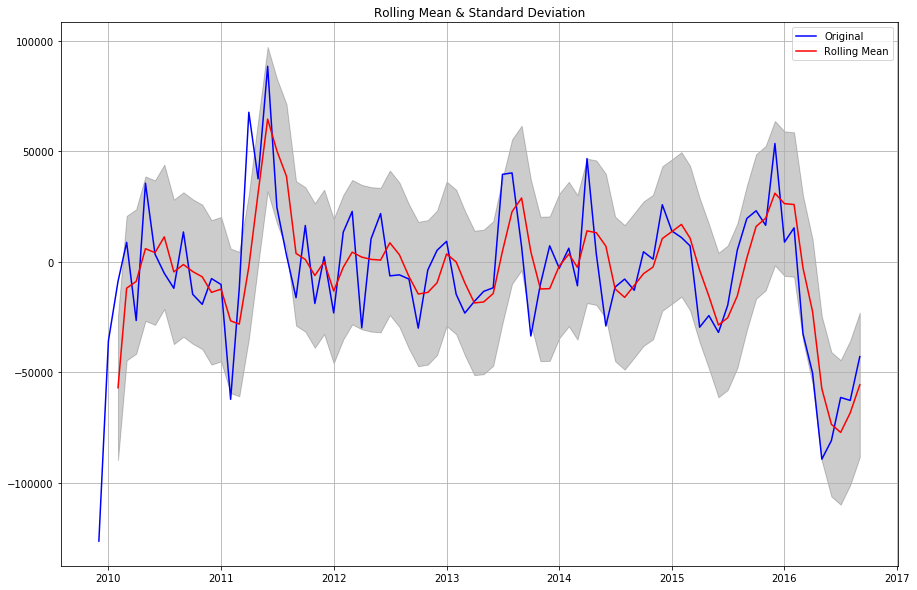

In [17]:
#Determing rolling statistics
#Flagstaff
rolmean = pd.rolling_mean(ts_logf_decompose, window=3)
std  = ts_logf_decompose.std()
plt.fill_between(ts_logf_decompose.index, rolmean+std, rolmean-std, color='k', alpha=.2) 
#Plot rolling statistics:
orig = plt.plot(ts_logf_decompose, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.grid()
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.figure(figsize=(15,10))

#Determing rolling statistics
#Bourke Street Mall
rolmean = pd.rolling_mean(ts_logB_decompose, window=3)
std  = ts_logB_decompose.std()
plt.fill_between(ts_logB_decompose.index, rolmean+std, rolmean-std, color='k', alpha=.2) 
#Plot rolling statistics:
orig = plt.plot(ts_logB_decompose, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.grid()
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.figure(figsize=(15,10))

plt.show()

#COmpared to Bourke Street Mall (Casual), there are still quite a lot of variance with my Flagstaff data
# This suggests pedestrian usage of Commuter areas can vary a lot depending on the event or type of day as compared to casual areas that are more frequently used.


In [42]:
headline = pd.read_csv('./data_imgs/Headlines_1.csv')
headline= headline.loc[:,['Date','Headline']] 

headline.head()

Date                                           Headline
0  2013-09-01         Paul Roos named Melbourne Demons AFL coach
1  2013-09-01  Paul Roos recruits former Sydney development c...
2  2013-09-01  Adam Bandt claims victory for Greens in seat o...
3  2013-09-01                             Freo land in Melbourne
4  2013-09-01             Singapore firms buy up Melbourne sites

<img src="./data_imgs/outliers2016.png">

In [44]:
# from scipy.misc import imread
# from wordcloud import WordCloud, STOPWORDS
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
# from sklearn.metrics import accuracy_score
# from nltk.corpus import stopwords
# import string
# import re
# STOPLIST = set( ['Melbourne', 'Sydney'] + list(STOPWORDS))


# for month in headline.Date.unique():
#     subset = headline[headline['Date'] == month]
#     words = ' '.join(subset['Headline'])
#     print(month)
#     wordcloud = WordCloud(stopwords=STOPLIST,
#                     background_color='white',
#                     width=1800,
#                     height=1400
#             ).generate(words)

#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()

Forecast melbourne visitor flow.

In [22]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<b>Flagstaff Station

In [23]:

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Flagstaff_Station,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3247641.624558328
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1765.912828046144
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2072.86742438504
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2051.6419040781843
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1786.2237955476016
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1767.6281978614663
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2638.2898907478166
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2282.697333557678
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2030.0958841312558
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1738.882404716567
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2327.6508193572918
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2273.035494835247
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1787.3153306739205
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1739.8619093601158
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2089.1139862275277
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1776.0476166721346
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2099.6455784399377
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2078.1497477706353

In [24]:
mod = sm.tsa.statespace.SARIMAX(Flagstaff_Station,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12), #smallest AIC
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultsf = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1134      0.313     -0.362      0.717      -0.727       0.500
ma.L1         -0.8000      0.094     -8.485      0.000      -0.985      -0.615
ar.S.L12      -0.3993      0.976     -0.409      0.683      -2.313       1.514
ma.S.L12       0.1426      1.182      0.121      0.904      -2.174       2.459
sigma2      6.692e+09   4.57e-10   1.47e+19      0.000    6.69e+09    6.69e+09


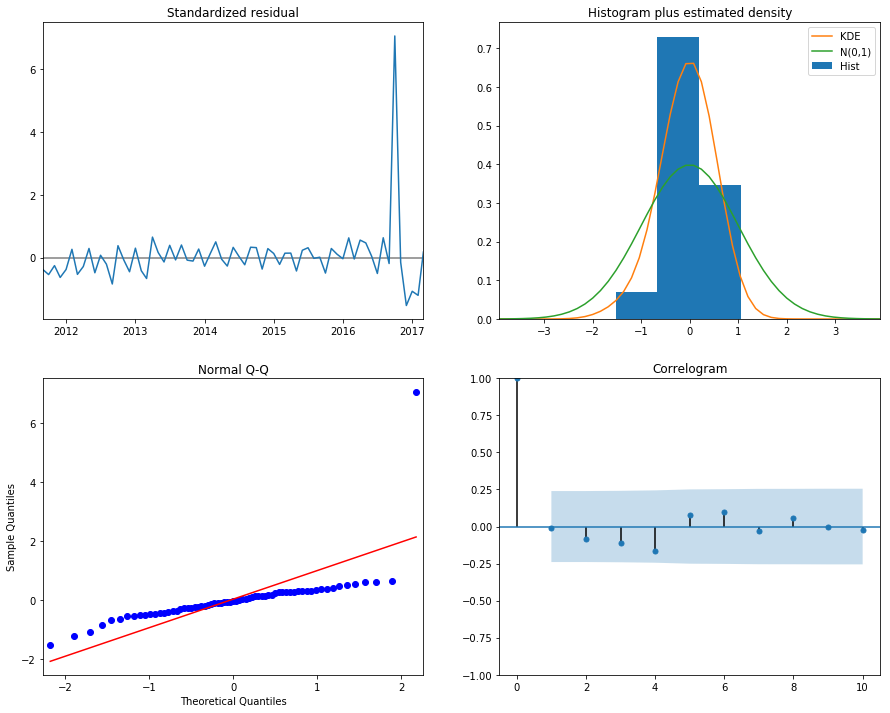

In [25]:
resultsf.plot_diagnostics(figsize=(15, 12))
plt.show()

In [26]:
predf = resultsf.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
predf_ci = predf.conf_int(alpha=0.10)

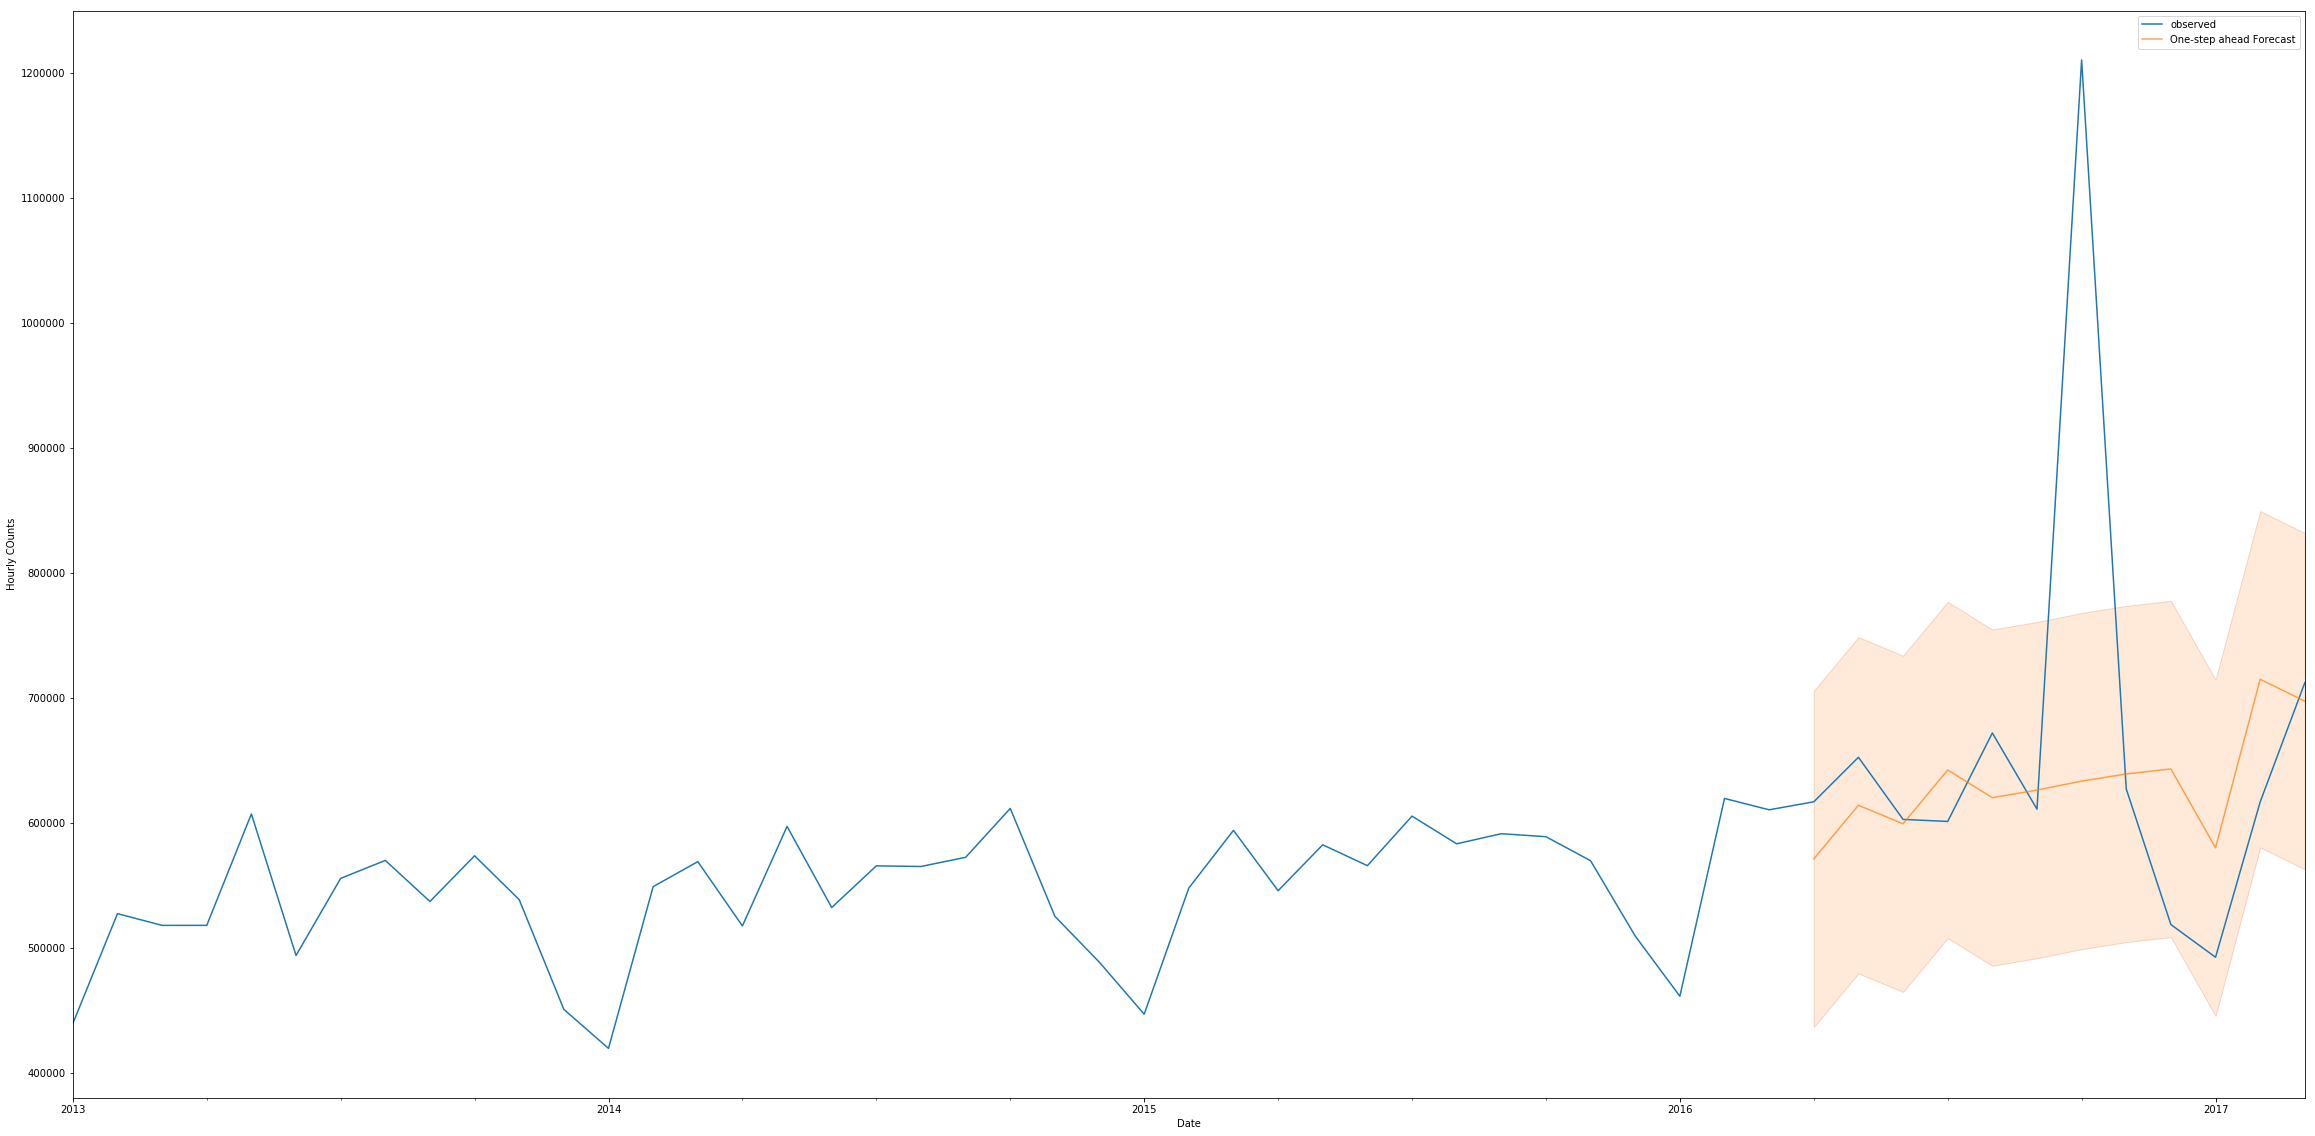

In [27]:
ax = Flagstaff_Station['2013':].plot(label='observed', figsize=(40, 20))
predf.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(predf_ci.index,
                predf_ci.iloc[:, 0],
                predf_ci.iloc[:, 1], edgecolor='#CC4F1B', facecolor='#FF9848', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Hourly COunts')
plt.legend()

plt.show()


In [29]:
y_forecasted = predf.predicted_mean
y_truth = Flagstaff_Station['2016-04-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


#dynamic forecast did not better my result so I left it out
# pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=True, full_results=True)
# pred_dynamic_ci = pred_dynamic.conf_int(alpha=0.1)

The Mean Squared Error of our forecasts is 31212276952.33


<b>Bourke Street Mall

In [30]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Bourke_Street_Mall_South,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2386.3220369360142
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1789.3199007715866
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2131.2844115048247
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2104.5385031031115
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1816.9662023795338
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1786.6563362596576
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2715.73114042224
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2347.1745018425036
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2073.452236820511
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1763.1910423762924
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2394.907877394765
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2338.6454183353767
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1815.7224061299792
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1762.2928819246558
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2150.3356936506325
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1802.8473112838465
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2137.3112777166584
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2112.3827880322

In [31]:
mod = sm.tsa.statespace.SARIMAX(Bourke_Street_Mall_South,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultsB = mod.fit()

print(resultsB.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7481      0.064    -11.730      0.000      -0.873      -0.623
ar.S.L12      -0.5359      0.625     -0.857      0.391      -1.761       0.690
ma.S.L12       0.4347      0.837      0.520      0.603      -1.205       2.074
sigma2      1.088e+10   8.32e-10   1.31e+19      0.000    1.09e+10    1.09e+10


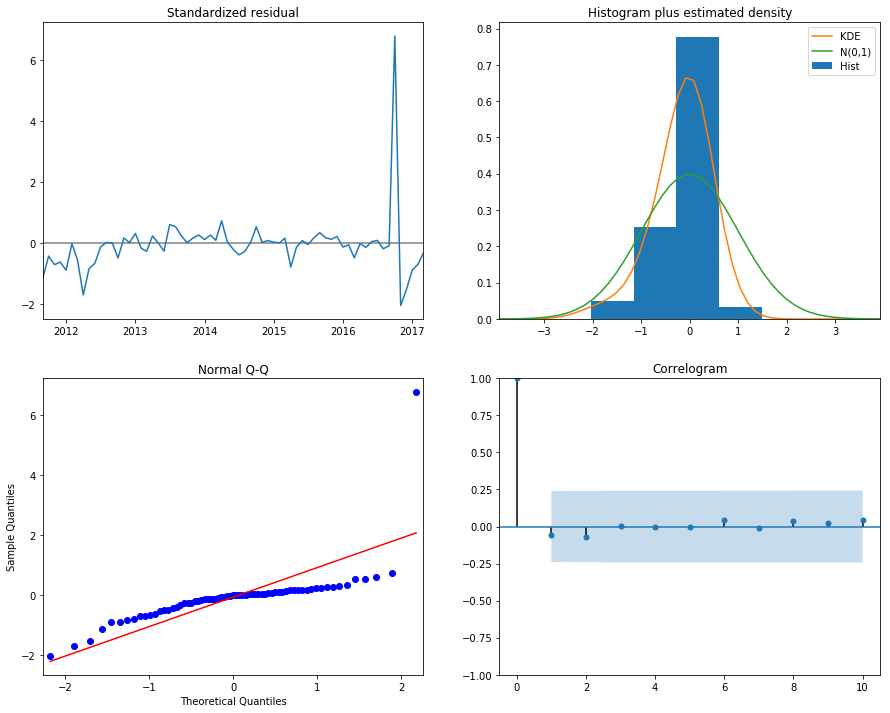

In [32]:
resultsB.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
predB = resultsB.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
predB_ci = predB.conf_int(alpha=0.10)

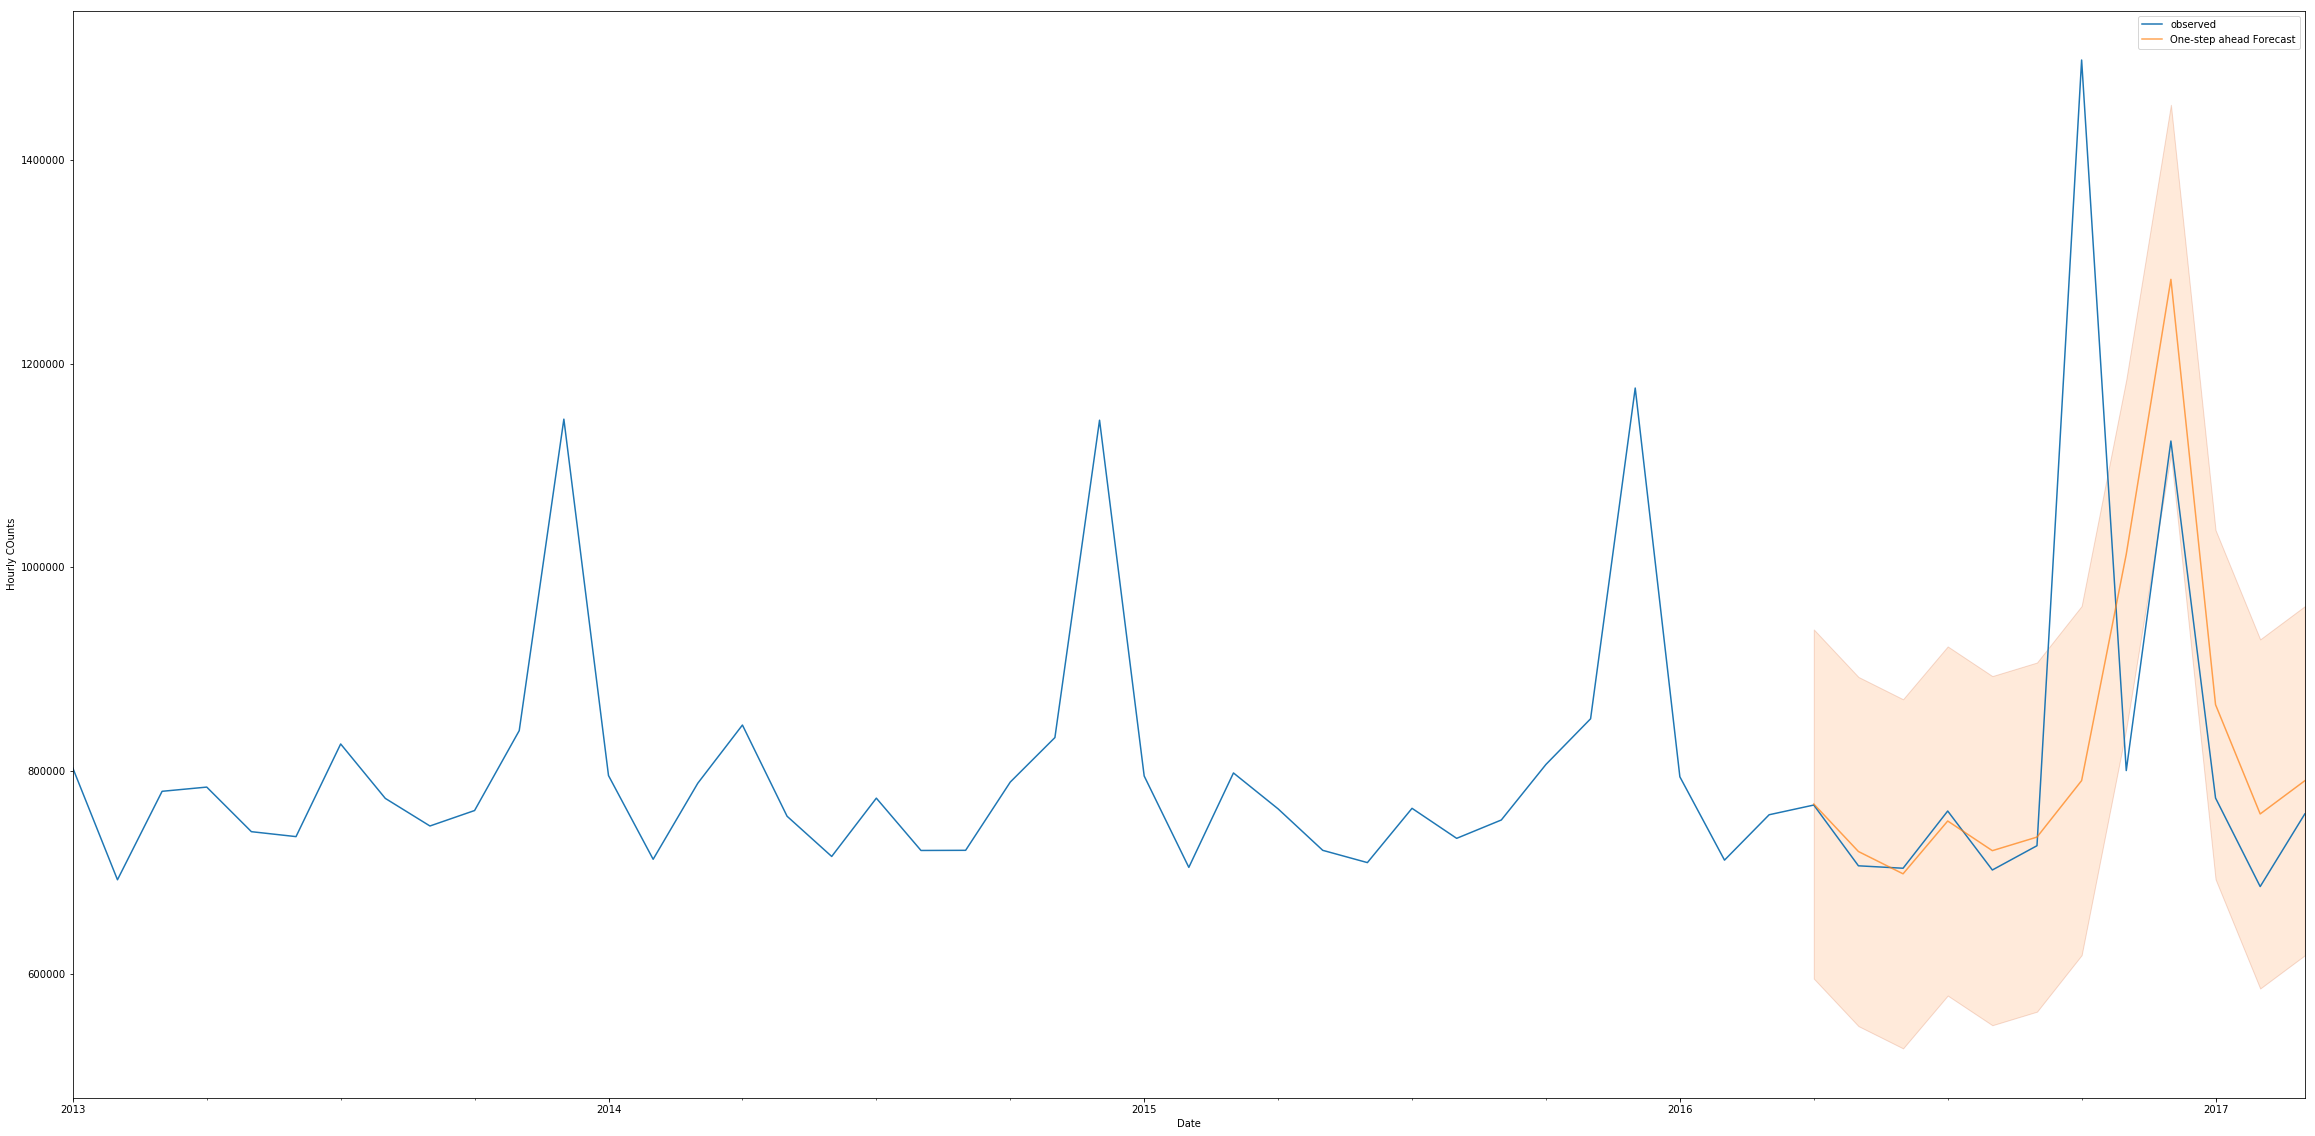

In [34]:
ax = Bourke_Street_Mall_South['2013':].plot(label='observed', figsize=(40, 20))
predB.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(predB_ci.index,
                predB_ci.iloc[:, 0],
                predB_ci.iloc[:, 1], edgecolor='#CC4F1B', facecolor='#FF9848', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Hourly COunts')
plt.legend()

plt.show()

In [36]:
y_forecasted = predB.predicted_mean
y_truth = Bourke_Street_Mall_South['2016-04-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 48930555976.09


Interestingly,trend for Bourke Street Mall is more predictable and follows the trend more closely. I had initially thought that Flagstaff Station that follows working hours would be easier to predict.  

The reason for this might be because Flagstaff Station is must more affected than public Holidays and events than Bourke Street is (casual pedestrians are going to go out no matter what, even if it is slightly more on certain days).

Also, time series for both areas were able to detect october 2016 spike as an anomaly and not follow that trend. It is difficult to say what caused the spike in October. There are multiple events going on in Melbourne in October (including Royal Melbourne Show, Melbourne Marathon and the Melbourne Cup) but it still seems abnormaly high compared to previous years where the same events also occured.